<a href="https://colab.research.google.com/github/Chuanhuan/Pycode/blob/main/myCNN_pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Start with installing python packages

In [1]:
!pip install alibi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.7/522.7 KB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 106.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 102.0 MB/s eta 0:00:00


In [2]:
import os
import sys
import argparse
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
# import torchvision.transforms as transforms
from torchvision import transforms, datasets
from torch.utils.data.sampler import SubsetRandomSampler
# from lime import lime_image
# from pdb import set_trace
# from torch.autograd import Variable

In [3]:
from torchvision.datasets import FashionMNIST
mnist = FashionMNIST(root='./', download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



In [4]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Download fashion MNIST from torchvison datasets

In [5]:
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.FashionMNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.FashionMNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)

batch_size = 64
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle =True, num_workers = 2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle =False, num_workers = 2)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



quick check the length of data

In [6]:
print(len(train_loader))
print(len(train_data))
60000/64

938
60000


937.5

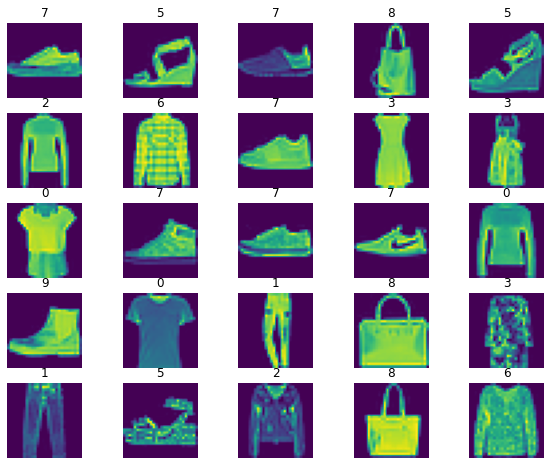

In [7]:
# add_subplot with defined rows

figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze())
plt.show()

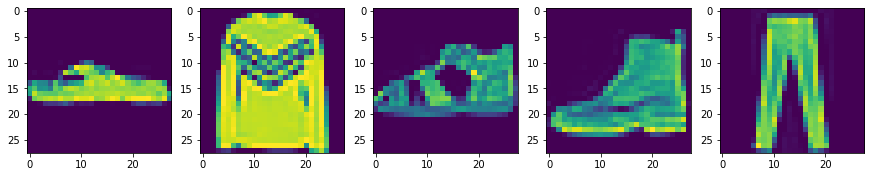

In [8]:
# define supplots before loop
n = 5
fig, axs = plt.subplots(1, n, figsize=(15, 8))
for i in range(n):
  img_indices = [torch.randint(len(train_data), size=(1,)).item() for _ in range(1)]

  images, labels = train_data[img_indices[0]]

  axs[i].imshow(images.cpu().permute(1, 2, 0))

# Using SLIC

pick one imge and using SLIC the see the segmentation

(28, 28)


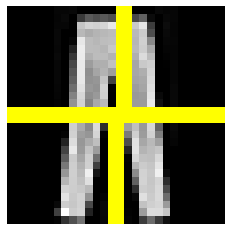

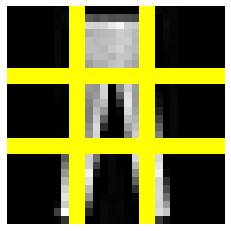

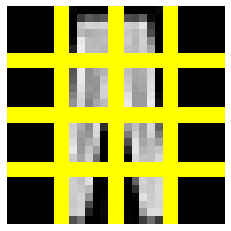

In [9]:
from skimage import io
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage.segmentation import slic


# load the image and convert it to a floating point data type
# image = img_as_float(io.imread())
image = img_as_float(images.squeeze())
print(image.shape)

# loop over the number of segments
for numSegments in (3, 10, 15):
	# apply SLIC and extract (approximately) the supplied number
	# of segments
	segments = slic(image, n_segments = numSegments, sigma = 5)
	# show the output of SLIC
	fig = plt.figure("Superpixels -- %d segments" % (numSegments))
	ax = fig.add_subplot(1, 1, 1)
	ax.imshow(mark_boundaries(image, segments))
  # ax.imshow(segments)
	plt.axis("off")
# show the plots
# print(segments.shape)
plt.show()

In [10]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
# or download pretrain model from torchvision
# model = torchvision.models.resnet18(pretrained=True)

model.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

replace the last layer of the model with a fully connected layer that has 10 output units, one for each class in the Fashion MNIST dataset:

In [11]:

num_ftrs = model.fc.in_features
print('The original model\'s last full connected layer features: %d' %(num_ftrs))
model.fc = nn.Linear(num_ftrs, 10)


The original model's last full connected layer features: 512


In [12]:
a = torch.randn([2,1,4])
print(a.shape)
a.squeeze().shape

torch.Size([2, 1, 4])


torch.Size([2, 4])

In [15]:
device = "cuda" if torch.cuda.is_available() else "cpu"


# Replicate the grayscale channel 3 times to create a 3-channel image
def grayscale_to_rgb(x):
    # (1,28,28) need to squeeze to (28,28)
    return torch.stack((x.squeeze(),)*3, axis=1)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Move the model to GPU
model.train().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Train the model on GPU
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        # Convert grayscale to RGB
        inputs = grayscale_to_rgb(inputs)

        # Move the inputs and labels to GPU
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 199:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished Training')


[1,   200] loss: 0.362
[1,   400] loss: 0.272
[1,   600] loss: 0.247
[1,   800] loss: 0.247
[2,   200] loss: 0.189
[2,   400] loss: 0.192
[2,   600] loss: 0.192
[2,   800] loss: 0.181
[3,   200] loss: 0.159
[3,   400] loss: 0.150
[3,   600] loss: 0.154
[3,   800] loss: 0.158
[4,   200] loss: 0.128
[4,   400] loss: 0.128
[4,   600] loss: 0.139
[4,   800] loss: 0.142
[5,   200] loss: 0.110
[5,   400] loss: 0.114
[5,   600] loss: 0.122
[5,   800] loss: 0.117
[6,   200] loss: 0.094
[6,   400] loss: 0.095
[6,   600] loss: 0.113
[6,   800] loss: 0.107
[7,   200] loss: 0.084
[7,   400] loss: 0.087
[7,   600] loss: 0.097
[7,   800] loss: 0.094
[8,   200] loss: 0.070
[8,   400] loss: 0.087
[8,   600] loss: 0.076
[8,   800] loss: 0.081
[9,   200] loss: 0.065
[9,   400] loss: 0.067
[9,   600] loss: 0.075
[9,   800] loss: 0.075
[10,   200] loss: 0.058
[10,   400] loss: 0.062
[10,   600] loss: 0.074
[10,   800] loss: 0.064
Finished Training


In [16]:
# test data switch to eval
model.eval().to(device)

total = 0  # keeps track of how many images we have processed 
correct = 0  # keeps track of how many correct images our net predicts
with torch.no_grad():
    for i, data in enumerate(test_loader): 

        inputs, labels = data
        # Convert grayscale to RGB
        inputs = grayscale_to_rgb(inputs)

        # Move the inputs and labels to GPU
        inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = model(inputs)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size()[0]
        correct += (predicted == labels).sum().item()
    
print("Accuracy: ", correct/total)

class_correct = list(0 for i in range(10))  # Holds how many correct images for the class
class_total = list(0 for i in range(10))  # Holds total images for the class 
d_class2idx = train_data.class_to_idx
d_idx2class = dict(zip(d_class2idx.values(), d_class2idx.keys()))

with torch.no_grad(): 
    for i, data in enumerate(test_loader): 

        inputs, labels = data
        # Convert grayscale to RGB
        inputs = grayscale_to_rgb(inputs)

        # Move the inputs and labels to GPU
        inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = model(inputs)


        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels)
        for j in range(4): 
            label = labels[j]
            class_correct[label] += c[j].item()
            class_total[label] += 1
            
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        d_idx2class[i], 100 * class_correct[i] / class_total[i]))

Accuracy:  0.921
Accuracy of T-shirt/top : 80 %
Accuracy of Trouser : 96 %
Accuracy of Pullover : 88 %
Accuracy of Dress : 88 %
Accuracy of  Coat : 93 %
Accuracy of Sandal : 98 %
Accuracy of Shirt : 73 %
Accuracy of Sneaker : 100 %
Accuracy of   Bag : 98 %
Accuracy of Ankle boot : 96 %
